In [11]:
import requests
import datetime as dt

In [125]:
def get_orders(date: (list,str), period: (list,int), generation: (list,float), demand: (list,float), sys_price: (list,float)):
    """Calculates bid quantity and bid direction and returns resulting bid order."""
    
    assert isinstance(date,(list,str))
    assert isinstance(period,(list,int))
    assert isinstance(generation,(list,float))
    assert isinstance(demand,(list,float))
    assert isinstance(sys_price,(list,float))
    
    
    
    if not all(isinstance(v,list) for v in [date, period, generation, demand, sys_price]):  #Check for single record
        net = generation - demand
        direction = 'SELL' if net >= 0 else 'BUY'
    
        orders = {"applying_date": date,"hour_ID": period,"type": direction,"volume": abs(net),"price": sys_price}
        flow = [(net,direction)]
    else:
            
        flow = []
        orders = []
        for pos in range(len(date)):
        
            net = generation[pos] - demand[pos]
            direction = 'SELL' if net >= 0 else 'BUY'
        
            order = {"applying_date": date[pos],"hour_ID": period[pos],"type": direction,"volume": abs(net),"price": sys_price[pos]}
            orders.append(order)
            flow.append((net,direction))
        
    return orders,flow

dates = [(dt.date.today()+dt.timedelta(days=2)).isoformat()]
orders,flow = get_orders(dates,[15],[100.0],[90.0],[1.0])

print(orders)

[{'applying_date': '2021-07-04', 'hour_ID': 15, 'type': 'SELL', 'volume': 10.0, 'price': 1.0}]


In [126]:
def submit_orders(orders):
    AIMLAC_CC_MACHINE = "34.72.51.59"
    assert AIMLAC_CC_MACHINE is not None
    host = f"http://{AIMLAC_CC_MACHINE}"
    key = "AgileSnails8394587201"
    
    p = requests.post(url=host + "/auction/bidding/set",
                      json={
                          "key":
                          key,
                          "orders": orders
                      })

    d = p.json()
    print("Posting bids:")
    print("POST JSON reply:", d)
    assert d["accepted"] == 1
    assert d["message"] == ''
    
    print('done.')
    
submit_orders(orders)

Posting bids:
POST JSON reply: {'accepted': 1, 'message': ''}
done.


In [107]:
start = dt.date.today()
n = 10

dates = [start + dt.timedelta(hours=i*0.5) for i in range(n)]
period = list(range(n))
gens = list(np.random.uniform(0,100,n))
demand = list(np.random.uniform(0,100,n))
price = list(np.random.uniform(0,1,n))

orders,flow = get_orders(dates,period,gens,demand,price)

for order in orders:
    print(order)

{'applying_date': datetime.date(2021, 7, 2), 'hour_ID': 0, 'type': 'SELL', 'volume': 7.826507358237777, 'price': 0.887688471056168}
{'applying_date': datetime.date(2021, 7, 2), 'hour_ID': 1, 'type': 'SELL', 'volume': 57.64354214709622, 'price': 0.7037826231189936}
{'applying_date': datetime.date(2021, 7, 2), 'hour_ID': 2, 'type': 'SELL', 'volume': 16.037974249183453, 'price': 0.3080205417821533}
{'applying_date': datetime.date(2021, 7, 2), 'hour_ID': 3, 'type': 'SELL', 'volume': 17.808688781972698, 'price': 0.7152711009937347}
{'applying_date': datetime.date(2021, 7, 2), 'hour_ID': 4, 'type': 'BUY', 'volume': 35.23318898947311, 'price': 0.43051969065334794}
{'applying_date': datetime.date(2021, 7, 2), 'hour_ID': 5, 'type': 'BUY', 'volume': 5.477336750361118, 'price': 0.1453730354270446}
{'applying_date': datetime.date(2021, 7, 2), 'hour_ID': 6, 'type': 'BUY', 'volume': 24.6221117631505, 'price': 0.557563856967849}
{'applying_date': datetime.date(2021, 7, 2), 'hour_ID': 7, 'type': 'BUY'

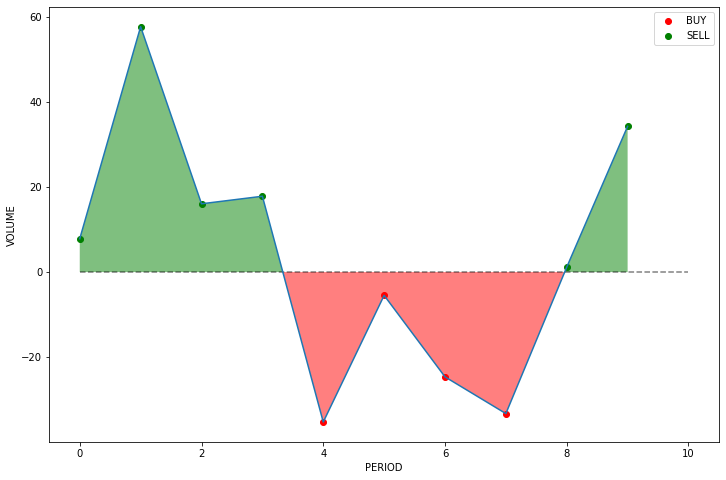

In [122]:
import matplotlib.pyplot as plt

period = np.arange(0,n)
flow = np.asarray(flow)
vol = flow[:,0].astype(float)

ci = flow[:,1] == 'BUY' 

plt.figure(figsize=(12,8))
plt.plot(period,vol)
plt.scatter(period[ci],vol[ci],c='r',label='BUY')
plt.scatter(period[np.logical_not(ci)],vol[np.logical_not(ci)],c='g',label='SELL')
plt.hlines(0,0,n,ls='--',alpha=0.5,color='k')
plt.fill_between(period,vol,where=vol >= 0,facecolor='green',alpha=0.5,interpolate='true')
plt.fill_between(period,vol,where=vol < 0,facecolor='red',alpha=0.5,interpolate='true')
plt.xlabel('PERIOD')
plt.ylabel('VOLUME')
plt.legend()